# Executive Summary (To be done)

G. Provide an executive summary of your findings, including the rationale of choosing the model you chose, iterations, etc. 10 points

This is separate from the explanation and logic mentioned above. he Executive summary is a brief report on your entire project in less than 1000 words (loosely). Use paragraphs, headings, bullet points, numerical data to your advantage. You should include:

The business question in brief
Any important methodological steps or decisions
Key findings
Your model including rationale, iterations, etc.
Your final conclusions and actionable recommendations.
You can also refer to any key figure or table in this section (re-insert the table within the executive summary in that case). This really is the crux of business communication, so take some time in crafting this. 

# Dataset Description
The dataset consists of 41.2 thousand valid entries, comprising various personal, economic, and contact-related attributes, such as age, employment, education, housing, loans, communication types, and campaign-related details. It spans a wide age range from 17 to 98 years, with the majority being administrators and blue-collar workers. Most of the individuals hold a university degree and do not have any default credits. The dataset indicates a majority of the individuals are married and have been contacted via cell phones. The month of May, Thursdays, and Mondays are the most common times for contact. Pertaining to economic indicators, the dataset includes consumer price and confidence indices and the Euribor 3-month rate.

The following table lays out specific statistics for each category:

| Category                           | Statistics                                            | Type          |
| ---------------------------------- | ----------------------------------------------------- | ----------------|
| Age                                | 17 - 98 Mean: 40, Std. Dev: 10.4, Mode: 29.15, 33.20 | Continuous    |
| Employment                         | 25% Administrators, 22% Blue-Collar, Others varied   | Categorical   |
| Education                          | 30% University Degree, 23% High School                | Categorical   |
| Credit Default                     | 79% No Default                                        | Binary        |
| Housing                            | 52% Have Loans, 45% No Loans                          | Binary        |
| Personal Loans                     | 15% Have Loans, 82% No Loans                          | Binary        |
| Marital Status                     | 61% Married, 28% Single                               | Categorical   |
| Communication Type                 | 63% Cell Phones, 37% Telephone                        | Binary        |
| Contact Month                      | Most common: May 33%                                  | Categorical   |
| Contact Day                        | Most common: Thursdays, Mondays 21%                   | Categorical   |
| Number of Employees                | 4964 - 5228 Mean: 5170                                | Continuous    |
| Term Deposit Subscription ('y')    | 11.3% Yes, 88.7% No                                   | Binary        |
| Call Duration (Seconds)            | 0 - 4918 Average: 258                                 | Continuous    |
| Contact Frequency in Current Campaign | Most individuals contacted less than 3.75 times   | Continuous    |
| 'pdays'                            | Majority were not previously contacted                 | Continuous    |
| 'previous'                         | Majority were not contacted in previous campaigns      | Continuous    |
| 'poutcome'                         | No previous campaign for 86% of cases                  | Categorical   |
| Consumer Price Index               | 92.2 - 94.8 Mean: 93.6                                | Continuous    |
| Consumer Confidence Index          | 50.8 - 26.9 Mean: 40.5                                | Continuous    |
| 'euribor3m' (3-month Euribor interest rate) | Average: 3.62                                  | Continuous    |


# Business Question
Because the dataset contains a wide variety of indicators and demographic data, such as job, campaign, economic, subscription, and loan data, bank executives can make many decisions and answer numerous questions.

For example, assessment of marketing campaign effectiveness would be an important metric to measure and would allow the company to adjust their strategies in accordance with the findings. They would be able to identify which demographics have a propensity to subscribe to their term deposit and therefore help create an effective and targeted marketing strategy. They could also investigate how economic variables play into their campaigns, such as how employment rates affect term deposits.
Choosing from a few of these many metrics, a realistic business question that can be asked is ”How effective are our campaigns for people who have been previously contacted?" By comparing the 'previous' (number of contacts before this campaign) and 'y' variables, the bank can begin to determine the effectiveness of their recurring marketing efforts.

Once preliminary findings have been established, further analysis can be done to determine if other variables such as age and occupation play a role as well.

# Outcome Variable

From the question highlighted above, the outcome variable for this analysis will be 'y', representing whether or not a person has subscribed to a term deposit. The primary independent variable of interest will be 'previous', indicating the number of previous contacts performed with a person.
The 'previous' variable provides a measure of past engagement with a person. By comparing the subscription rate ('y') among those who have been previously contacted (i.e., 'previous' > 0 and those who haven't (i.e., 'previous' = 0, we can assess the effectiveness of our campaigns among those who have been previously contacted.

For example, if it turns out that the subscription rate is significantly higher among those who have been previously contacted, it would suggest that our campaigns are more effective when we have an existing relationship with the person. On the other hand, if there is no significant difference in the subscription rate, it could suggest that the number of previous contacts does not have a strong impact on the effectiveness of our campaigns.

# Prediction Method
When it comes to choosing between Logistic Regression or Decision Trees for our question at hand, the most ideal method would be the Decision Tree model.
Reasoning for this decision include these strengths of the Decision Tree:
1. **Categorical Handling:** Categorical variables are a built-in feature with Decision Trees, and because the dataset contains many categories, it would be most compatible with this model.
2. **Interpretability:** Decision trees are opinionated and offer clear,concise rules. This allows for easy interpretability when we use the model to make predictions about campaign effectiveness  Bock).
3. **Interaction Handling:** Decision Trees can account for interactions between multiple variables, which would be beneficial when looking to see how economic variables affect term loan rates. For example, it would be of interest to look into the role of age and occupation in tandem with the number of previous contacts.
That having been said, a flaw that Decision Trees exhibit is that they’re prone to overfitting  Kunani). It can be mitigated by maintaining a shorter tree or setting constraints on the maximum depth and/or minimum samples per leaf. Additionally, while Logistic Regression might not be an ideal choice for the question at hand, it’s a popular and useful method for simple classification.

# Exploratory Analysis

## Initializing

#### Importing Libraries
The script starts by importing several useful Python libraries:
- pandas for data handling and manipulation,
- seaborn and matplotlib.pyplot for data visualization. 

These libraries are commonly used in data science and analytics for working with data and creating visualizations.

#### Iterating Over Files in a Directory
The script uses os.walk() function to iterate over all the directories and files under the specified path ('/kaggle/input'). The function generates the file names in a directory tree by walking the tree either top-down or bottom-up.
For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).
- dirpath is a string, the path to the directory.
- dirnames is a list of the names of the subdirectories in dirpath (excluding '.' and '..').
- filenames is a list of the names of the non-directory files in dirpath.

The os.path.join(dirname, filename) command is then used to print the full file path for every file found in the walk.

In [1]:
# Initializing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


## Understanding the Data

We will be utilizing this following Python code snippet as part of our initial exploratory data analysis when encountering a new dataset. The script makes use of the pandas library, an essential tool in our data science kit, which aids in efficient data manipulation and analysis. Right now, the main focus is to gain a rough understanding of the data's main statistical indicators. From this, we can begin planning which indicators might be the most important or useful for anwsering the question at hand.

In [2]:
# Defining "df" and displaying significant values
df = pd.read_csv('/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv')
df.head()
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Visualizing the Data

The following figure was run to analyze the correlation between different numerical variables in the dataframe 'df'. Correlation provides an indication of how related two variables might be. It can be a useful tool to identify the relationships between variables, which can be critical in many situations like feature selection, multivariate analysis, and model building in predictive analytics.

We will focus on the following predictors for the remainder of this analyis:

**'previous'**: the number of times a customer was contacted before the current campaign or period.

**'poutcome'**: the outcome of the previous marketing campaign (e.g., "success," "failure").

**'campaign'**: the number of contacts performed during the current marketing campaign for a specific client.

/tmp/ipykernel_34/1971348184.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'poutcome'] = le.fit_transform(df['poutcome'])


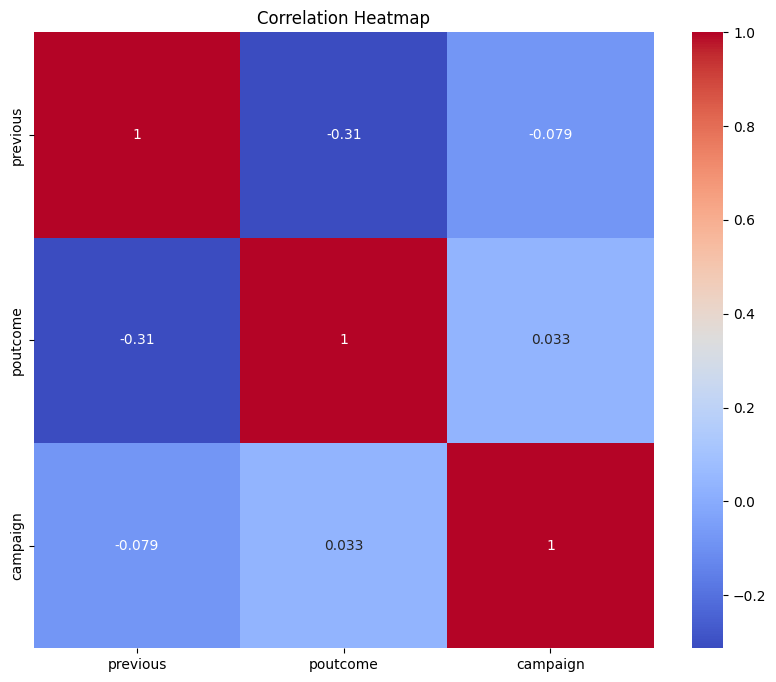

In [3]:
# Selecting the features
selected_df = df[['previous', 'poutcome', 'campaign']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:, 'poutcome'] = le.fit_transform(df['poutcome'])
selected_df = df[['previous', 'poutcome', 'campaign']]


# Calculate the correlation
correlation = selected_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We see here in our heatmap that our predictor variables have a considerably low correlation. Correlation measures linear relationships between variables, but decision trees can capture non-linear relationships as well. For example, there might be a specific combination of 'previous', 'poutcome', and 'campaign' values that predict a high likelihood of term deposit subscription, and a decision tree model could potentially capture this. Because of this, we will also run our predictor variables through a decision tree model to capture the non-linear perspective.

## Defining the Decision Tree Model

In order to predict the outcome variable 'y' (Term Deposit Subscription), we will be using the Decision Tree model. The reasons for this have been previously mentioned - namely, its effectiveness with categorical variables, interpretability, and ability to handle multiple variable interactions.

## Creating the Model

In [4]:
# Selecting variables for prediction 
selected_features = ['previous', 'poutcome', 'campaign']

# Creating Dummy Variables for Categorical Features
df_dummies = pd.get_dummies(df[selected_features])

# Predictor and Target Variables
X = df_dummies
y = df['y']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Decision Tree Model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fitting the model
tree.fit(X_train, y_train)

# Predicting the test set results
y_pred = tree.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7303
         yes       0.64      0.18      0.28       935

    accuracy                           0.90      8238
   macro avg       0.77      0.58      0.61      8238
weighted avg       0.87      0.90      0.87      8238

Accuracy Score: 0.8954843408594318


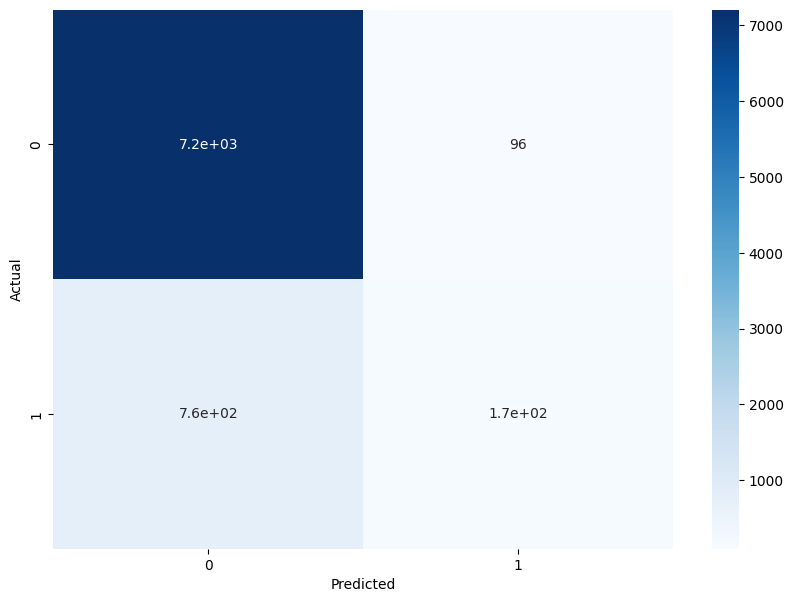

+----+-----------+--------------+
|    | feature   |   importance |
|----+-----------+--------------|
|  0 | previous  |    0.0621157 |
|  1 | poutcome  |    0.907802  |
|  2 | campaign  |    0.0300826 |
+----+-----------+--------------+


In [5]:
# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyzing the feature importances
importances = tree.feature_importances_
feature_names = X.columns

# Create a DataFrame to view the importances
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})

print(tabulate(importance_df, headers='keys', tablefmt='psql'))

## Description

### About the Model

The final model employed in this task is a Decision Tree Classifier, a powerful machine learning algorithm used for both classification and regression purposes. Decision Tree Classifier creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

#### Model Performance

The model's performance was evaluated using different metrics:

Classification Report: It provides precision, recall, and F1-score for each class. The precision is a measure of how many positive predictions were actually correct. Recall indicates how many actual positives the model managed to capture. The F1-score is a balanced representation of precision and recall.
Accuracy Score: It is the fraction of correct predictions made by the model. For our model, the accuracy score is approximately 0.89.

The effect of predictors on the outcome is gauged by the feature importances. Feature importance gives a score for each feature of the data, with the higher the score, the more important or relevant the feature towards the output variable.

As it stands, the model appears to have significant room for improvement, specifically in its performance predicting 'yes' outcomes. A potential solution could be to implement a more balanced dataset or to fine-tune the model's parameters. Further analysis of the feature importances might also help in refining the model for better performance.

#### Thought Process


# Works Cited
Bock, Tim. “Decision Trees Are Usually Better Than Logistic Regression.” Displayr,
https://www.displayr.com/decision-trees-are-usually-better-than-logistic -regression/. Accessed 20 May 2023.

Euribor Rates. Euribor rates - all information on Euribor, https://www.euribor-rates.eu/en/. Accessed 19 May 2023.

Kunani, R. “Decision Trees and Random Forests.” HackMD, https://hackmd.io/@rkunani/decision-tree. Accessed 20 May 2023.